In [1]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import tensorflow as tf

In [2]:
from google.colab import drive
drive.mount('/content/mnt')

Mounted at /content/mnt


In [3]:
data_folder = '/content/mnt/MyDrive/데이터'

In [7]:
data = np.load(f'{data_folder}/data_celeba.npz')

In [16]:
list(data)

['X_data', 'Y_data']

In [14]:
X=data['X_data']; y=data['Y_data']
# X=data[list(data)[0]]; y=data[list(data)[1]]  # 위와 똑같은 결과 이나 list(data)의 0번째, 1번째와 같은 얘기임
np.shape(X), np.shape(y)

((2000, 72, 59, 3), (2000, 2))

In [15]:
# y값은 성별과 웃음여부로 구성되어 있음
y_gender=y[:,0]
y_smile=y[:,1]

성별:여(0)남(1)  / 웃음여부:웃음x(0)/웃음(1)  


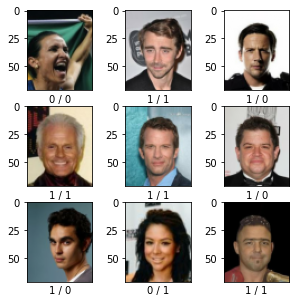

In [50]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(777)

sample_size = 9
random_idx = np.random.randint(60000, size=sample_size) 

plt.figure(figsize = (5, 5))
print( '성별:여(0)남(1)  / 웃음여부:웃음x(0)/웃음(1)  ' )
for i, idx in enumerate(random_idx):
    plt.subplot(3, 3, i+1)
    plt.xticks([])
    #plt.yticks([])
    plt.imshow(X[i])
    
    plt.xlabel(str(y_gender[i]) + ' / ' + str(y_smile[i]))
plt.show()

---x값---


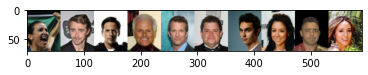

---y value---
[0 1 1 1 1] [0 1 0 1 1 0 0 1 1 1]


In [19]:
# 5개의 이미지를 수평으로 나란히 출력

print('---x값---')
plt.imshow(np.hstack(X[:10]))        # hstack 오른쪽으로 이어 붙히기 기능이 있음
plt.show()

print('---y value---')
print(y_gender[:5], y_smile[:10])

In [22]:
# 0~1값만 나오면 이미 스케일링 된 자료
np.min(x_train), np.max(x_train)

(0, 255)

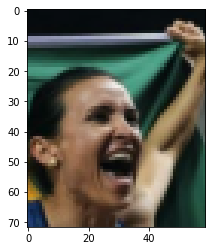

In [25]:
plt.imshow(X[0])

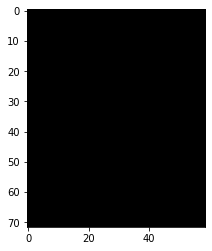

In [26]:
# 스케일링은 두번하면 하기사진과 같이 됨
plt.imshow(X[0]/255)

In [27]:
# 성별만 가지고 작업. x,y 데이터셋 나누기
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(X, y_gender, 
                                                  test_size = 0.3, random_state = 777)

print(x_train.shape, len(y_train))
print(x_val.shape, len(y_val))

(1400, 72, 59, 3) 1400
(600, 72, 59, 3) 600


In [30]:
# 원자료의 비율
print(np.unique(y_gender, return_counts=True))

(array([0, 1], dtype=int8), array([1006,  994]))


In [ ]:
# 과연 y데이터의 분할은 편향없이 잘 되었나를 확인
# -> 훈련(트레이닝)과 테스트자료에 0과 1의 값의 분포가 비슷한가

# 결과물은 트레이닝의 y의 0이값이 00개 1의값이 00개
# 결과물은 테스트의 y의 값이 0값이 00개 1의값이 00개

In [53]:
import collections, numpy
print(collections.Counter(y_train))
print(collections.Counter(y_val))

Counter({0: 726, 1: 674})
Counter({1: 320, 0: 280})


In [54]:
print(np.unique(y_train, return_counts=True))
print(np.unique(y_val, return_counts=True))

(array([0, 1], dtype=int8), array([726, 674]))
(array([0, 1], dtype=int8), array([280, 320]))


In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

model = Sequential()
# (32, 32, 3)의 데이터를 입력으로 받습니다. 
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (72, 59, 3)))
# 들어가는 값 나오는 값 꼭 맞춰줘야함
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))

model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))

model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(2, activation = 'softmax')) # 2개의 출력을 가지는 신경망

In [32]:
model.compile(optimizer = Adam(1e-4),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['acc'])

In [33]:
history = model.fit(x_train, y_train,
                    epochs = 30,
                    batch_size = 32,
                    validation_data = (x_val, y_val))

Epoch 1/30
44/44 [==============================] - 41s 924ms/step - loss: 0.6669 - acc: 0.5750 - val_loss: 0.6113 - val_acc: 0.6483
Epoch 2/30
44/44 [==============================] - 40s 912ms/step - loss: 0.5579 - acc: 0.7171 - val_loss: 0.5099 - val_acc: 0.7650
Epoch 3/30
44/44 [==============================] - 40s 915ms/step - loss: 0.4891 - acc: 0.7757 - val_loss: 0.4863 - val_acc: 0.7650
Epoch 4/30
44/44 [==============================] - 40s 918ms/step - loss: 0.4414 - acc: 0.7957 - val_loss: 0.4909 - val_acc: 0.7650
Epoch 5/30
44/44 [==============================] - 40s 916ms/step - loss: 0.4044 - acc: 0.8207 - val_loss: 0.4397 - val_acc: 0.7850
Epoch 6/30
44/44 [==============================] - 40s 920ms/step - loss: 0.3779 - acc: 0.8336 - val_loss: 0.4012 - val_acc: 0.8067
Epoch 7/30
44/44 [==============================] - 41s 936ms/step - loss: 0.3467 - acc: 0.8486 - val_loss: 0.4033 - val_acc: 0.8067
Epoch 8/30
44/44 [==============================] - 41s 934ms/step - 

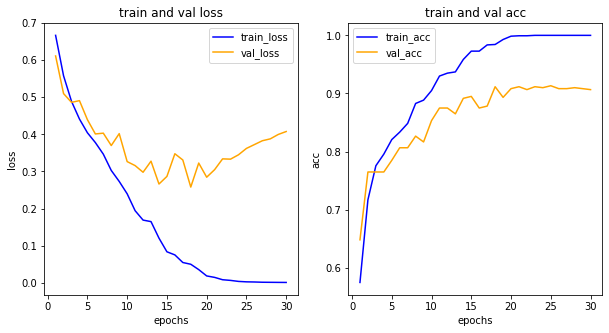

In [51]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] 

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

---x테스트---


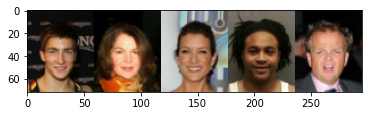

---y test value----
[1 0 0 1 1]
---y 예측값 value
1 male
0 female
0 female
1 male
1 male


In [35]:
# 테스트데이터셋

y_pred=model.predict(x_val[:5])

print('---x테스트---')
plt.imshow(np.hstack(x_val[:5]))
plt.show()

print('---y test value----')
print(y_val[:5])

class_names=['female','male']
print('---y 예측값 value')
for i in y_pred:
  print(np.argmax(i),class_names[np.argmax(i)])


In [37]:
# 데이터셋이 아닌 한장의 사진으로 확인

# model.predict(x_val[0])       # 에러 발생함 dim갯수가 맞지않음

model.predict(x_val[0:1])       # 텐서 모델은 4개의 dim이어야함.
np.shape(x_val[0]), np.shape(x_val[0:1])

((72, 59, 3), (1, 72, 59, 3))

(72, 59, 3)
(72, 59, 3)
(1, 72, 59, 3)
[[3.4535896e-07 9.9999964e-01]]
1
male


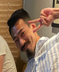

In [49]:
# 사진을 불러와서 모델 예측을 하려면 이 작업에서 필요한 전처리
# 1. 리사이즈(높이72,너비59)
# 2. 반드시 3채널이야함(컬러이어야함)
# 3. 스케일링 0~1사이값으로, 제공된 npz의 스케일링 방법을 모르기때문에 이부분은 스케일링 한 사람만 정확하게 할 수 있음
#    -> 여기서는 그냥 255로 나눈값임
# 4. 텐서입력 shape으로 변경해야함. -> (72,59,3) -> (1,72,59,3)

from PIL import Image
img = Image.open('사진2.jpg')
img = img.resize((59, 72))      # PIL에서는 너비, 높이로 나옴. 텐서 input은 높이, 너비임
print(np.shape(img))
imgArr=np.array(img)/255
print(np.shape(imgArr))

newX=imgArr.reshape(1,72,59,3)
print(np.shape(newX))      # 최종 input값임

print(model.predict(newX))
print(np.argmax(model.predict(newX)))
print(class_names[np.argmax(model.predict(newX))])

img

In [ ]:
# 이자료는 과적합 해소도 해야하고 모델 잘 되면
# model.save해서 h5로 갖고 다녀야함.
# 또는 model.fit할때 에포크 단위로 저장할 수 있도록 체크 포인트 저장하면 좋음.

In [52]:
from keras.models import load_model
model.save('male_female.h5')